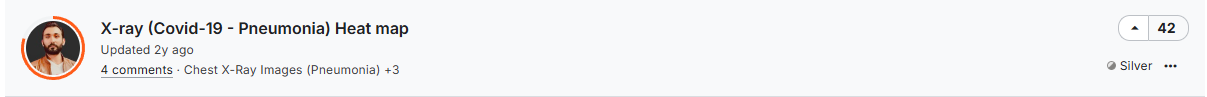

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import pathlib
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

In [2]:
dataset_folder = r"D:\code_study\ML_CODE\dataSets\Covid-19_Image_Dataset\Covid19-dataset"
dataset_folder = dataset_folder.replace("\\", "/")
datasetObject = pathlib.Path(os.path.join(dataset_folder))
images = list(datasetObject.glob("*/*/*.*"))
len(images)
train_folder = dataset_folder + "/train"
test_folder = dataset_folder + "/test"

In [3]:
image_data_generator = ImageDataGenerator(
    rescale = 1/255, vertical_flip= False, horizontal_flip=True, zoom_range=0.1, zca_whitening=False,
    samplewise_center=True, samplewise_std_normalization=True, validation_split= 0.1,
    rotation_range=0.2)
training_dataset = image_data_generator.flow_from_directory(
    train_folder, target_size = (224, 224), color_mode ='rgb',subset='training', batch_size=8, shuffle=True
)
validation_dataset = image_data_generator.flow_from_directory(
    test_folder,  target_size=(224, 224), color_mode = 'rgb', subset='validation', batch_size = 8, shuffle = True
)

Found 226 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
c:\Users\Leaper\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers

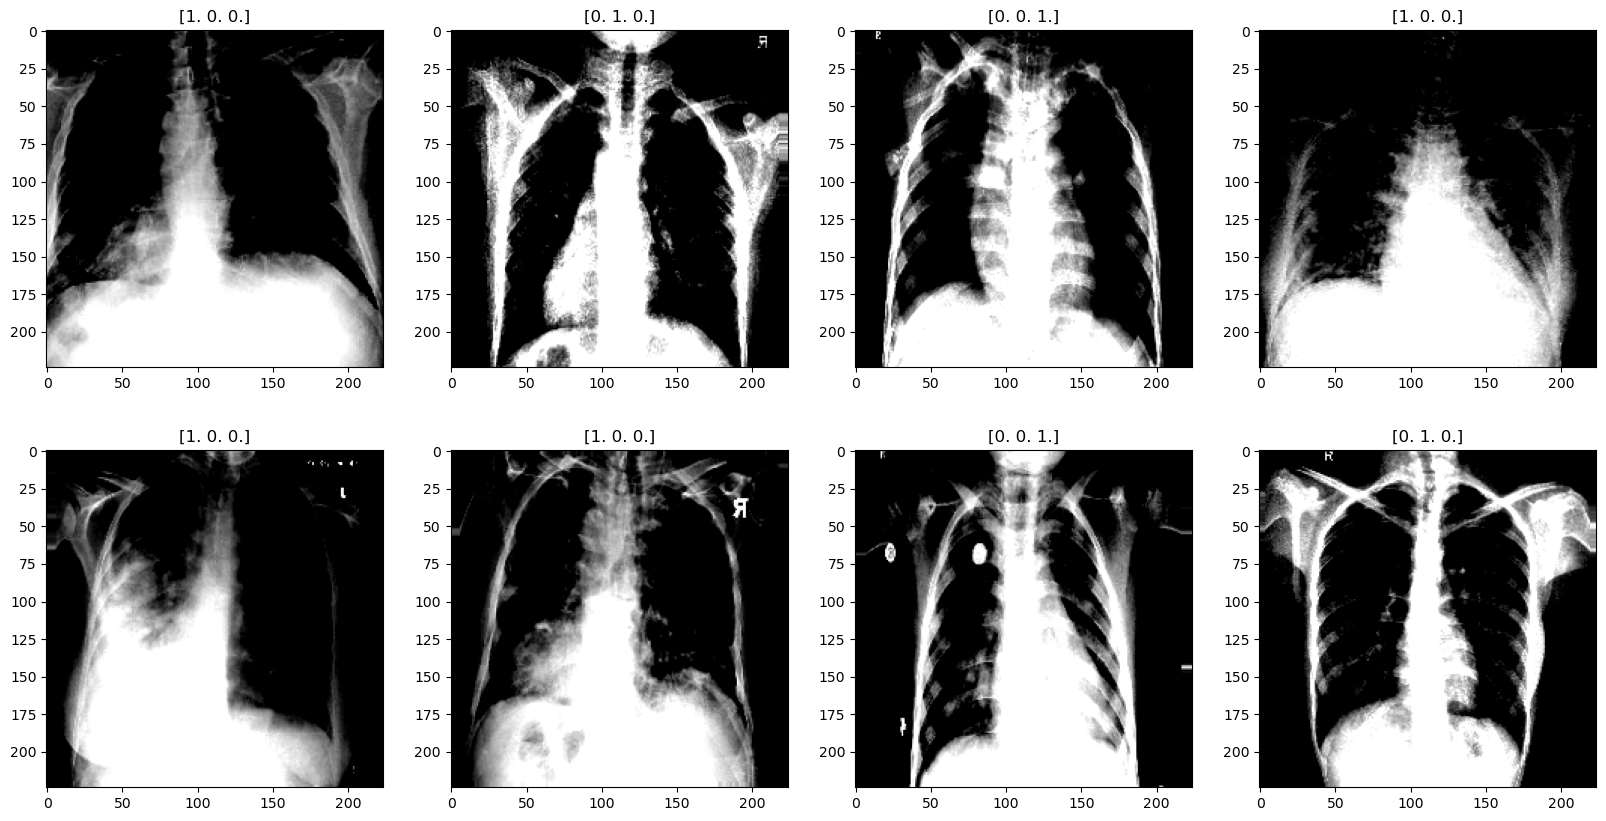

In [4]:
single_batch = training_dataset.next()
images = single_batch[0]
label = single_batch[1]
plt.figure(figsize = (20, 10))
for i in range(8):
  plt.subplot(2, 4, (i + 1))
  plt.imshow(images[i])
  plt.title(label[i])
plt.show()

In [5]:
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [6]:
unique_classes = np.unique(training_dataset.classes)
print(len(unique_classes))

3


In [7]:
training_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [8]:
np.asarray(images[0]).shape

(224, 224, 3)

In [9]:
np.unique(images[0])

array([-2.5575185, -2.5138812, -2.4980812, ...,  1.5248039,  1.5276222,
        1.5291746], dtype=float32)

In [10]:
from tensorflow.keras.applications import densenet
from tensorflow.keras.initializers import GlorotNormal
d = densenet.DenseNet121(weights=None, include_top = False, input_shape = (224, 224, 3))

In [16]:
print(d.output_shape)
m = tf.keras.layers.Dropout(0.7)(d.output)
m = tf.keras.layers.GlobalAveragePooling2D()(m)                         
m = tf.keras.layers.Dropout(0.7)(m)
m = tf.keras.layers.Dense(len(unique_classes), kernel_initializer=GlorotNormal(),
                          activation = 'softmax', kernel_regularizer= tf.keras.regularizers.L2(0.0001),
                          bias_regularizer= tf.keras.regularizers.L2(0.0001))(m)
m = tf.keras.models.Model(inputs = d.input, outputs = m)
#m.load_weights("chexnet-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5", by_name=True, skip_mismatch=True)
for layer in m.layers[:200]:
    layer.trainable = False
for layer in m.layers[200:]:
    layer.trainable = True

(None, 7, 7, 1024)


In [17]:
m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), 
          loss = 'categorical_crossentropy', 
          metrics =  [TruePositives(name='tp'),
                      FalsePositives(name='fp'),
                      TrueNegatives(name='tn'),
                      FalseNegatives(name='fn'), 
                      'accuracy',
                      Precision(name='precision'),
                      Recall(name='recall')])
     

In [18]:
m.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [19]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode = 'min',
                                                  patience= 2)

In [20]:

history = m.fit(
    training_dataset,
    validation_data = validation_dataset,
    batch_size = 8,
    epochs = 26,
    verbose = 1,
    callbacks = [ReduceLROnPlateau,
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, mode = 'min',
                                                  restore_best_weights=True)]
)

Epoch 1/26
29/29 [==============================] - 13s 315ms/step - loss: 1.3351 - tp: 30.0667 - fp: 53.8667 - tn: 185.2000 - fn: 89.4667 - accuracy: 0.3561 - precision: 0.3578 - recall: 0.2532 - val_loss: 1.0458 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12.0000 - val_fn: 6.0000 - val_accuracy: 0.3333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/26
29/29 [==============================] - 7s 250ms/step - loss: 1.1867 - tp: 35.4000 - fp: 45.0000 - tn: 194.0667 - fn: 84.1333 - accuracy: 0.4092 - precision: 0.4109 - recall: 0.2770 - val_loss: 1.0107 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12.0000 - val_fn: 6.0000 - val_accuracy: 0.3333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/26
29/29 [==============================] - 7s 252ms/step - loss: 1.2510 - tp: 36.3000 - fp: 55.8000 - tn: 186.8667 - fn: 85.0333 - accuracy: 0.4223 - precision: 0.4086 - recall: 0.3163 - val_loss: 1.0251 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 12.000

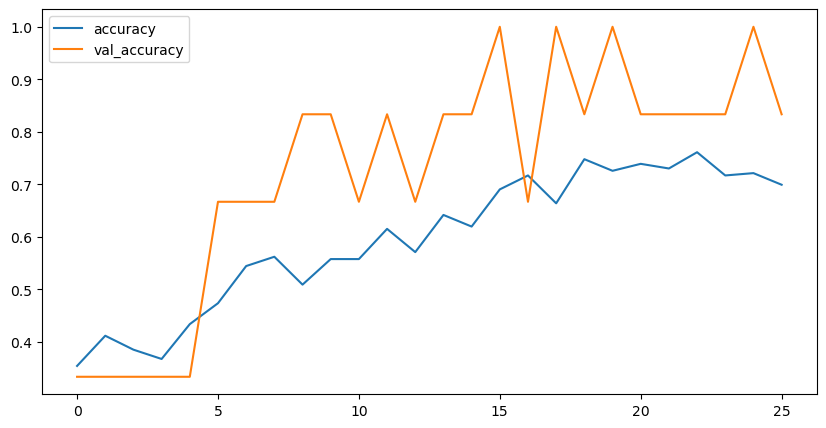

In [21]:

plt.figure(figsize = (10, 5))
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

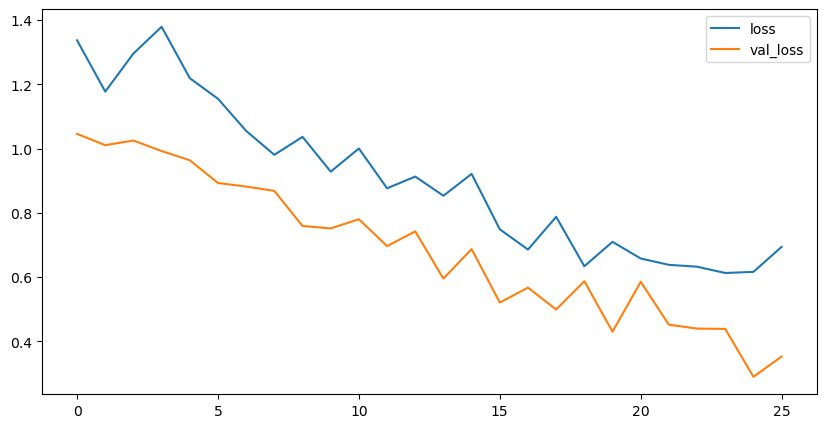

In [22]:

plt.figure(figsize = (10, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()
     

In [23]:
m.evaluate(validation_dataset, batch_size = 8)

1/1 [==============================] - 0s 392ms/step - loss: 0.3122 - tp: 5.0000 - fp: 0.0000e+00 - tn: 12.0000 - fn: 1.0000 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.8333


[0.31220290064811707, 5.0, 0.0, 12.0, 1.0, 1.0, 1.0, 0.8333333134651184]

In [24]:
m.save("model/brain_tumor.h5")

In [25]:
m = tf.keras.models.load_model("model/brain_tumor.h5")

In [26]:

single_image = cv2.imread(
    os.path.join(dataset_folder, "test", "Covid", "COVID-00012.jpg")
)
single_image = cv2.resize(single_image, (224, 224))
single_image = cv2.cvtColor(single_image, cv2.COLOR_BGR2RGB)

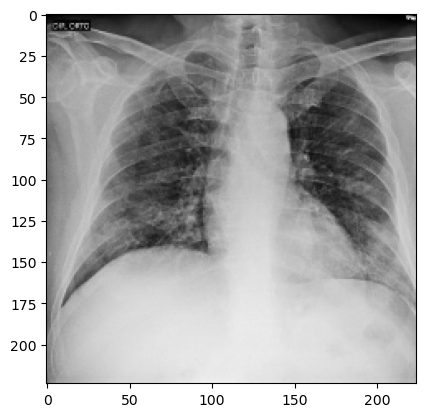

In [27]:
plt.imshow(single_image)
plt.show()

In [28]:

single_image.shape
     

(224, 224, 3)

In [29]:

img = single_image/255

In [30]:
img = np.asarray(img)
img = img.reshape(1, 224, 224, 3)
img.shape

(1, 224, 224, 3)

In [31]:
y_pred = m.predict(img)[0]
print(y_pred)
y_pred = np.argmax(y_pred)
y_pred

[0.883192   0.08303822 0.03376976]


0

In [38]:
classes = training_dataset.class_indices
classes = dict((v,k) for k,v in classes.items())
classes

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [39]:
classes[y_pred]

'Covid'

In [40]:
weights = m.layers[-1].get_weights()[0]

In [41]:
weights

array([[-0.01585335,  0.00765218, -0.09441516],
       [-0.04467365,  0.00532543, -0.07063797],
       [-0.0379297 , -0.02307576,  0.00030162],
       ...,
       [-0.09227977, -0.05282328, -0.01647589],
       [ 0.02278268, -0.06517044,  0.07943617],
       [ 0.05413786, -0.06646119, -0.03416277]], dtype=float32)

In [42]:
weights = np.asarray(weights)

In [43]:
weights.shape

(1024, 3)

In [46]:
weights = weights.reshape(weights.shape[1], weights.shape[0])
weights

array([[-0.01585335,  0.00765218, -0.09441516, ..., -0.04277221,
         0.07667565, -0.02835471],
       [ 0.10812591, -0.09769586,  0.04490127, ...,  0.08107208,
        -0.02172335, -0.05430945],
       [ 0.05730648,  0.06010154, -0.04516132, ...,  0.05413786,
        -0.06646119, -0.03416277]], dtype=float32)

In [47]:
weights.shape

(3, 1024)

In [50]:
weights_for_predicted_class_for_this_image = weights[y_pred]
weights_for_predicted_class_for_this_image

array([-0.01585335,  0.00765218, -0.09441516, ..., -0.04277221,
        0.07667565, -0.02835471], dtype=float32)

In [51]:
new_model = tf.keras.models.Model(
    m.input, 
    m.get_layer('conv5_block16_concat').output
)
     

In [52]:
output_con_layer = new_model.predict(img)[0]

In [53]:
output_con_layer.shape

(7, 7, 1024)

In [54]:

import scipy as sc

In [55]:
resize_image = sc.ndimage.zoom(output_con_layer, (int(224/output_con_layer.shape[0]), 
                                                  int(224/output_con_layer.shape[1]), 1))

In [56]:
resize_image.shape

(224, 224, 1024)

In [57]:
weights_for_predicted_class_for_this_image.shape

(1024,)

In [58]:
final_image = np.dot(
    resize_image.reshape(resize_image.shape[0]*resize_image.shape[1], resize_image.shape[2]),
    weights_for_predicted_class_for_this_image
).reshape(resize_image.shape[0], resize_image.shape[1])

In [59]:

final_image.shape

(224, 224)

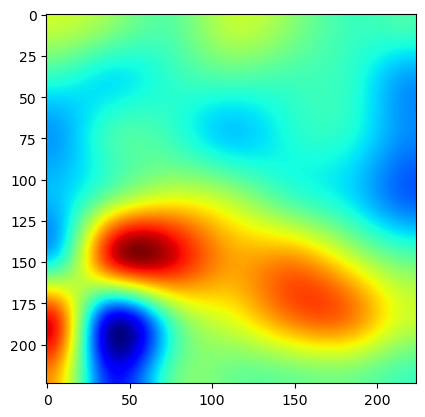

<Figure size 300x300 with 0 Axes>

In [60]:
plt.imshow(final_image, cmap='jet')
plt.figure(figsize = (3, 3))
plt.show()

In [61]:

img.shape

(1, 224, 224, 3)

In [62]:
img_ = img.reshape(224, 224, 3)
img_.shape

(224, 224, 3)

In [63]:
from matplotlib.patches import Rectangle   

In [64]:
np.unique(final_image)

array([-3.0935278, -3.0925279, -3.0905626, ...,  3.5563152,  3.5586388,
        3.558771 ], dtype=float32)

In [65]:

final_image.shape

(224, 224)

In [66]:
final_image = final_image/255

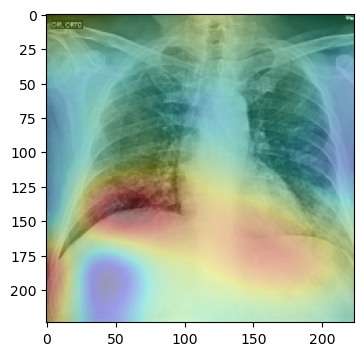

In [67]:

plt.figure(figsize = (4, 4))
plt.imshow(single_image)
plt.imshow(final_image, cmap='jet', alpha=0.3)

In [71]:
def getHeatMap(image):
  single_image = cv2.imread(image)
  single_image = cv2.resize(single_image, (224, 224))
  single_image = cv2.cvtColor(single_image, cv2.COLOR_BGR2RGB)
  img = single_image/255
  img = np.asarray(img)
  img = img.reshape(1, 224, 224, 3)
  y_pred = m.predict(img)[0]
  y_pred = np.argmax(y_pred)
  #classes = list({'COVID': 0, 'Viral Pneumonia': 1})
  classes = training_dataset.class_indices
  classes = dict((v,k) for k,v in classes.items())


  class_prediction = classes[y_pred]
  weights = m.layers[-1].get_weights()[0]
  weights = np.asarray(weights)
  weights = weights.reshape(weights.shape[1], weights.shape[0])
  weights_for_predicted_class_for_this_image = weights[y_pred]
  new_model = tf.keras.models.Model(
    m.input, 
    m.get_layer('conv5_block16_concat').output
    )
  output_con_layer = new_model.predict(img)[0]
  resize_image = sc.ndimage.zoom(output_con_layer, (int(224/output_con_layer.shape[0]), 
                                                  int(224/output_con_layer.shape[1]), 1))
  final_image = np.dot(
      resize_image.reshape(resize_image.shape[0]*resize_image.shape[1], resize_image.shape[2]),
      weights_for_predicted_class_for_this_image
  ).reshape(resize_image.shape[0], resize_image.shape[1])
  img_ = img.reshape(224, 224, 3)
  final_image = final_image/255
  return [img_, final_image, class_prediction]
     

In [72]:

datasetObject = pathlib.Path(os.path.join(dataset_folder))
images = list(datasetObject.glob("*/*/*.*"))
arr = []
for i in images[:8]:
  arr.append(getHeatMap(os.path.join(i)))

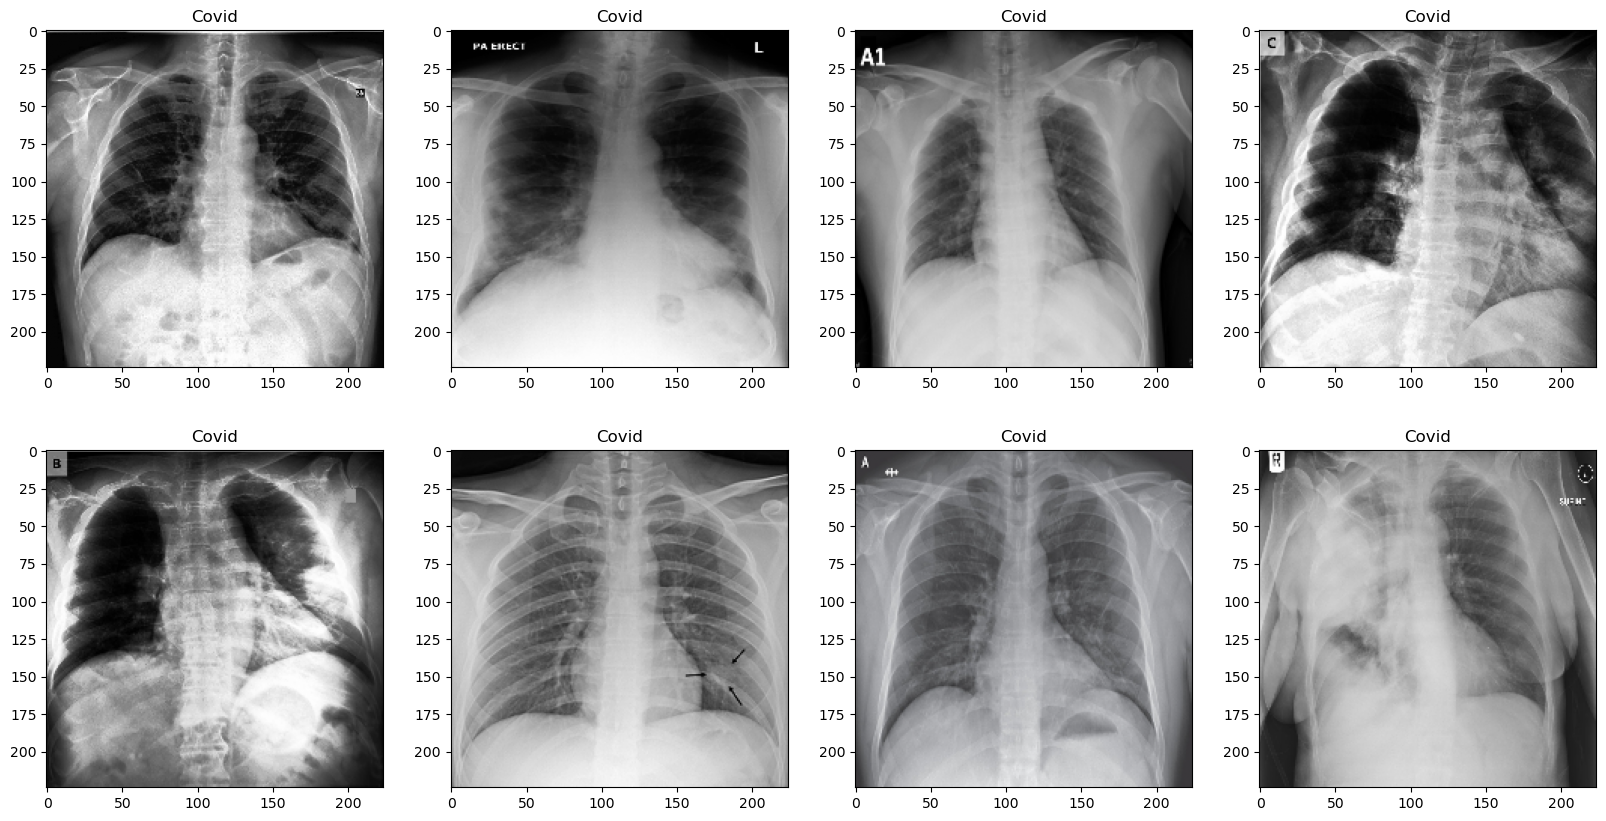

In [73]:

plt.figure(figsize = (20, 10))
for j, i in enumerate(arr[:8]):
  plt.subplot(2, 4, j + 1)
  plt.imshow(i[0])
  plt.title(i[2])
plt.show()  

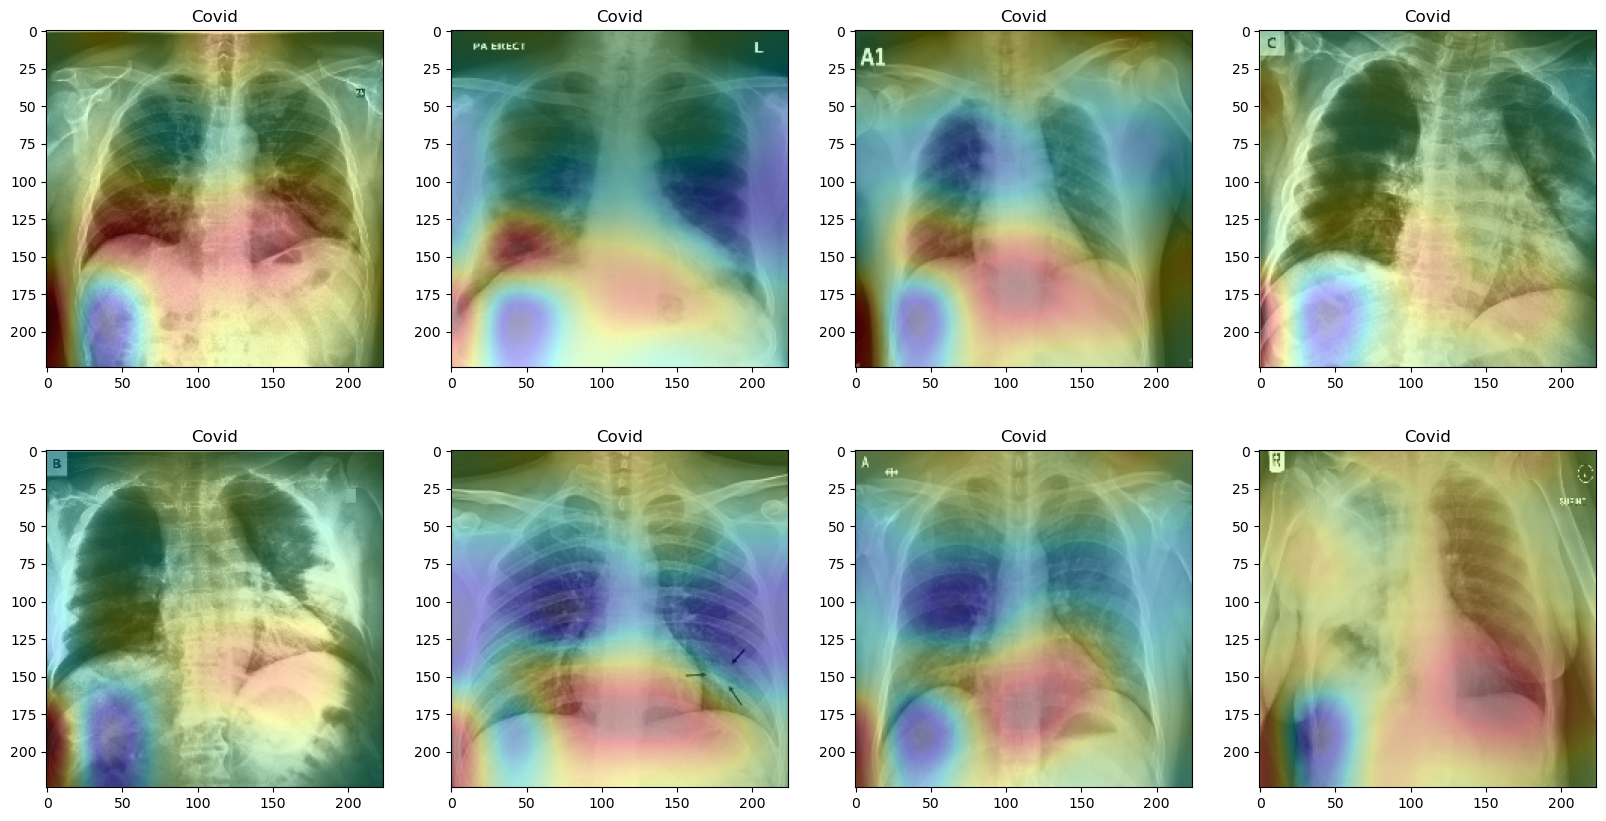

In [74]:

plt.figure(figsize = (20, 10))
for j, i in enumerate(arr[:8]):
  plt.subplot(2, 4, j + 1)
  plt.imshow(i[0])
  plt.imshow(i[1], cmap='jet', alpha=0.3)
  plt.title(i[2])
plt.show()  